CUSTOMER FEEDBACK SENTIMENT ANALYSER PROJECT : Prakash Hariba Ekatpure



# 1 . Simple NLP library for working with text data :

In [1]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from textblob import TextBlob


In [2]:
# 2. install libraries packages:

import pandas as pd        # handle dataset (tables )
import numpy as np         # math and numrical operations 
import re                  # text cleaning using patterns 
import string              # removig puctuation 
import nltk                # natural lanq.processing library 
import matplotlib.pyplot as plt    # for ploting - bar , line , pie , histogram 
import seaborn as sns      # ploting 


In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\PRAKASH EKATPURE\Downloads\archive\reviews.csv")

print(df.head())


                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
1    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
2    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
3    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
4    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   

                  dimension  ean                         keys  ...  \
0  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
1  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
2 

In [4]:
# 3 . cheking file existence  :


import os
print(os.path.exists(r"C:\Users\PRAKASH EKATPURE\Downloads\archive\reviews.csv"))


True


In [5]:
# 4 . load dataset of customer reviews  :
 
df=pd.read_csv(r"C:\Users\PRAKASH EKATPURE\Downloads\archive\reviews.csv")
print(df)

# df= dataframe 

                        id       asins   brand  \
0     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
1     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
2     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
3     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
4     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
...                    ...         ...     ...   
1592  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1593  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1594  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1595  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1596  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   

                                             categories colors  \
0                            Amazon Devices,mazon.co.uk    NaN   
1                            Amazon Devices,mazon.co.uk    NaN   
2                            Amazon Devices,mazon.co.uk    NaN   
3                            Amazon Devices,mazon.co.uk    NaN   
4                            Amazon Devices,mazon.co.uk    NaN   
...

In [6]:
# 5 .  define all columns :

print(df.columns)


Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')


In [7]:
# 6.  create sentiment labels : 


def sentiment(r):   # fun creation 
    if r >= 4:
        return "Positive"
    elif r == 3:
        return "Neutral"
    else:
        return "Negative"

df['sentiment'] = df['reviews.rating'].apply(sentiment) # apply fun to every row


In [8]:
# 7 .text cleaning :

def clean_text(text):       # creates a fun 
    text = text.lower()                       # lowercase
    text = re.sub(r'\d+', '', text)           # re - regex to remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # punctuation remove
    return text

df['reviews.text'] = df['reviews.text'].apply(clean_text)




In [9]:

import nltk
from nltk.corpus import stopwords
 
 # stopwards - comman useless words 

nltk.download('stopwords')

# rename columns first

df = df.rename(columns={                    # rename columns name 
    'reviews.text': 'review',
    'reviews.rating': 'rating'
})

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if pd.isna(text):                  # check if value  is empty 
        return ""
    text = text.lower()
    words = text.split()          # breaks the sentence into list of words 
    words = [w for w in words if w not in stop_words]
    return " ".join(words)        # it joines list of sentence 

df['review'] = df['review'].apply(remove_stopwords)

print(df[['review']].head())    # top 5 reviews


[nltk_data] Downloading package stopwords to C:\Users\PRAKASH
[nltk_data]     EKATPURE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review
0  initially trouble deciding paperwhite voyage r...
1  allow preface little history casual reader own...
2  enjoying far great reading original fire since...
3  bought one first paperwhites pleased constant ...
4  say upfront dont like coroporate hermetically ...


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()   # create object 

X = vectorizer.fit_transform(df['review'])   # features
y = df['sentiment']                         # labels



# fit - learn vocabulary from text 
# transform - convert each review to numbers 
# Tf - term frequency (how many times word appeares )
# vectoriser = converter  - It converts text ==>> numbers 

In [11]:
from sklearn.model_selection import train_test_split   # Used to split data into training and testing
from sklearn.linear_model import LogisticRegression   # ML algo. for classification (+ve ,-ve , spam , yes , no )

X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2)  # spliting datasets into two parts 1. training set and testing set 

#  0.2 = 20% (testing)  and 80% (traning )
 
model = LogisticRegression()  # creating model 
model.fit(X_train, y_train)   # train the model 


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [12]:
pred = model.predict(X_test) 

# pred : it stores predictions 
# model : trained logistic regession model  


In [13]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

# y_test ->> real answers 
# pred   ->> prediction answers 

Accuracy: 0.7625
              precision    recall  f1-score   support

    Negative       0.66      0.61      0.64        96
     Neutral       0.86      0.35      0.50        17
    Positive       0.80      0.86      0.83       207

    accuracy                           0.76       320
   macro avg       0.77      0.61      0.66       320
weighted avg       0.76      0.76      0.76       320



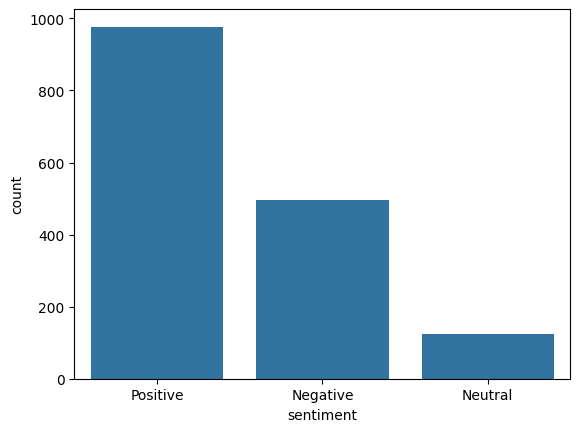

In [14]:
# visualisation barchart : 
 
sns.countplot(x=df['sentiment'])
plt.show()

# This uses Seaborn (sns) to create a count plot (bar chart).


In [15]:
from collections import Counter # counts frequency 

neg_reviews = " ".join(df[df['sentiment']=="Negative"]['review'])    # only negative consider 
words = neg_reviews.split()

print(Counter(words).most_common(10))


[('kindle', 794), ('fire', 679), ('amazon', 551), ('like', 520), ('tv', 474), ('prime', 462), ('use', 407), ('im', 351), ('device', 342), ('headphones', 338)]


In [16]:
# first 10 cleaned reviews with their sentiment labels :

import re

def clean_text(text):
    text = text.lower()                      # lowercase
    text = re.sub(r'[^a-zA-Z ]', '', text)   # remove punctuation
    return text

df['clean_review'] = df['review'].apply(clean_text)



In [17]:
df[['clean_review', 'sentiment']].head(10)


,clean_review,sentiment
0,initially trouble deciding paperwhite voyage r...,Positive
1,allow preface little history casual reader own...,Positive
2,enjoying far great reading original fire since...,Positive
3,bought one first paperwhites pleased constant ...,Positive
4,say upfront dont like coroporate hermetically ...,Positive
5,previous kindle dx second kindle years love fo...,Negative
6,allow preface little history casual reader own...,Negative
7,got mine right looks previous generation excep...,Negative
8,initially trouble deciding paperwhite voyage r...,Negative
9,enjoying far great reading original fire since...,Negative


In [18]:
# sentiment count :

print(df['sentiment'].value_counts())


sentiment
Positive    977
Negative    496
Neutral     124
Name: count, dtype: int64


In [19]:
# Sentiment Percentage (very useful for reports :

percent = df['sentiment'].value_counts(normalize=True) * 100
print(percent)

sentiment
Positive    61.177207
Negative    31.058234
Neutral      7.764559
Name: proportion, dtype: float64


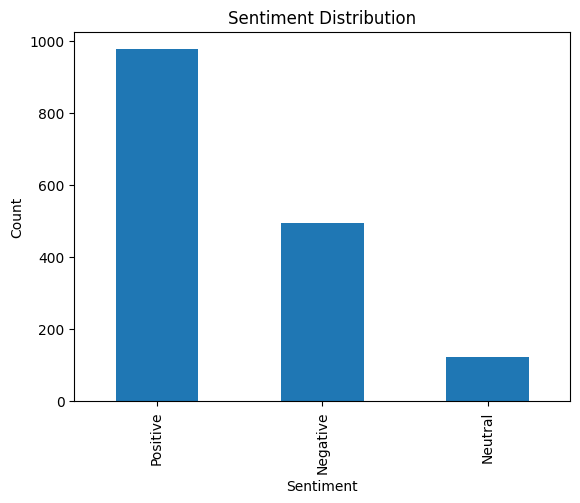

In [20]:
# Bar Chart Visualization :

df['sentiment'].value_counts().plot(kind='bar') 
plt.xlabel("Sentiment")
plt.ylabel("Count")          
plt.title("Sentiment Distribution")
plt.show()

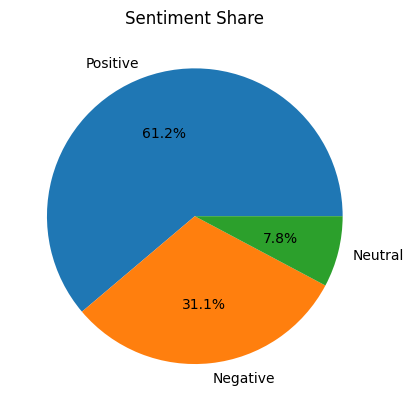

In [21]:
# Pie Chart: 

df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")
plt.title("Sentiment Share")
plt.show()


In [24]:
# polarity score :

df['polarity'] = df['clean_review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


In [25]:
df['polarity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [26]:
# Top 5 Positive :

df.sort_values('polarity', ascending=False).head(5)


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight,sentiment,clean_review,polarity
1432,AVzRlqklGV-KLJ3aavB0,B01HC1S9HU,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2017-06-22T20:55:30Z,2017-08-13T08:29:34Z,NaN,NaN,amazonkindleoasispremiumleatherbatterycoverbla...,...,Great color,NaN,NaN,Marco,NaN,NaN,4.6 ounces,Positive,excellent product awesome color,1.0
1431,AVzRlqklGV-KLJ3aavB0,B01HC1S9HU,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2017-06-22T20:55:30Z,2017-08-13T08:29:34Z,NaN,NaN,amazonkindleoasispremiumleatherbatterycoverbla...,...,Five Stars,NaN,NaN,HSBC,NaN,NaN,4.6 ounces,Positive,excellent,1.0
1381,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,Excellent product,NaN,NaN,Grimdad,NaN,8.416670e+11,1.75 lbs,Positive,would recommend anyone enjoys amazon excellent...,1.0
1184,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,Great speaker,NaN,NaN,Harper,NaN,8.416670e+11,1.75 lbs,Positive,use speaker time perfect would buy time time,1.0
1170,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,Worth every penny!,NaN,NaN,Eaglenut1,NaN,8.416670e+11,1.75 lbs,Positive,prime best thing buy,1.0


In [29]:
# information about all :
    
print("Total Reviews:", len(df))
print("Positive:", sum(df['sentiment']=="Positive"))
print("Negative:", sum(df['sentiment']=="Negative"))
print("Neutral:", sum(df['sentiment']=="Neutral"))


Total Reviews: 1597
Positive: 977
Negative: 496
Neutral: 124
